# **Prepare datasets**

In [2]:
import pandas as pd

In [12]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_valid = pd.read_csv('valid.csv')

df = df_train.append(df_valid, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11844\1981013973.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_valid, ignore_index=True)


In [13]:
df_test = pd.read_csv('test.csv')

df = df.append(df_test, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11844\959378454.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_test, ignore_index=True)


Kita cek isi datasetnya dan di dalamnya terdapat 1000 data. Terdiri dari:


*   Positive: 378
*   Neutral: 239
*   Negative: 383



In [14]:
df.head()

,id,text,label
0,219,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,209,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,436,Ibu pernah bekerja di grab indonesia,neutral
3,394,Paling suka banget makan siang di sini ayam sa...,positive
4,592,Pelayanan bus DAMRI sangat baik,positive


In [16]:
df.shape

(1000, 3)

In [6]:
df.label.value_counts()

negative    383
positive    378
neutral     239
Name: label, dtype: int64

# **Text Normalization/Cleansing**

Lalu kita lakukan cleansing sebagai berikut

In [17]:
import re 

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

In [18]:
df['text_clean'] = df.text.apply(cleansing)

In [19]:
df.head()

,id,text,label,text_clean
0,219,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral,nikmati cicilan 0 hingga 12 bulan untuk pemes...
1,209,Kue-kue yang disajikan bikin saya bernostalgia...,positive,kue kue yang disajikan bikin saya bernostalgia...
2,436,Ibu pernah bekerja di grab indonesia,neutral,ibu pernah bekerja di grab indonesia
3,394,Paling suka banget makan siang di sini ayam sa...,positive,paling suka banget makan siang di sini ayam sa...
4,592,Pelayanan bus DAMRI sangat baik,positive,pelayanan bus damri sangat baik


# **Feature Extraction: Bag of Words**

Setelah itu kita lakukan Feature Extraction menggunakan metode Bag of Words

In [20]:
# Kita simpan teks ke dalam sebuah variabel
data_preprocessed = df.text_clean.tolist()

In [21]:
data_preprocessed

['nikmati cicilan 0  hingga 12 bulan untuk pemesanan tiket pesawat air asia dengan kartu kredit bni ',
 'kue kue yang disajikan bikin saya bernostalgia  semuanya tipikal kue zaman dulu  baik dari penampilan maupun rasa  kuenya enak dan harganya juga murah ',
 'ibu pernah bekerja di grab indonesia',
 'paling suka banget makan siang di sini ayam sama sambalnya enak banget harganya luar biasa hemat  rasa ayamnya meresap sampai ketulangnya  es lidah buayanya juga segar bikin adem perut setelah makan sambal yang pedas  pelayannya sigap dan ramah  yang aku suka di tempat kasir ada tulisan 10  disumbangkan untuk beramal  buat makan jadi lebih enak ke perut',
 'pelayanan bus damri sangat baik',
 'mau bikin postingan yang isinya mengedukasi customers gojek ',
 'ratusan rumah di medan terendam banjir',
 'barangnya lumayan  cuma yang saya heran xiaomi redmi note 2 ini tombol onnya memang agak rusak  terus baterai memang cepat low bat juragan ',
 'sulit sekali mempercayai orang yang sudah pernah b

In [22]:
# Untuk melakukan Feature Extraction, kita menggunakan library "Sklearn atau scikit-learn".
# Sklearn adalah library untuk melakukan task-task Machine Learning.
# "CountVectorizer" merupakan salah satu modul untuk melakukan "BoW"

from sklearn.feature_extraction.text import CountVectorizer

# Kita proses Feature Extraction
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print ("Feature Extraction selesai")

Feature Extraction selesai


In [23]:
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

# **Prepare train & test datasets/Splitting Dataset**

Split dataset menjadi 80% untuk train dan 20% untuk test.

In [24]:
df

,id,text,label,text_clean
0,219,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral,nikmati cicilan 0 hingga 12 bulan untuk pemes...
1,209,Kue-kue yang disajikan bikin saya bernostalgia...,positive,kue kue yang disajikan bikin saya bernostalgia...
2,436,Ibu pernah bekerja di grab indonesia,neutral,ibu pernah bekerja di grab indonesia
3,394,Paling suka banget makan siang di sini ayam sa...,positive,paling suka banget makan siang di sini ayam sa...
4,592,Pelayanan bus DAMRI sangat baik,positive,pelayanan bus damri sangat baik
...,...,...,...,...
995,502,Saya sudah sering kali datang menikmati makana...,positive,saya sudah sering kali datang menikmati makana...
996,268,Banyak orang yang kurang suka untuk berobat ke...,negative,banyak orang yang kurang suka untuk berobat ke...
997,282,"Pelayanan baik, tempat parkir cukup luas, kebu...",positive,pelayanan baik tempat parkir cukup luas kebu...
998,407,"Demi apa pun tes cpns bikin macet, sialannnnnnn",negative,demi apa pun tes cpns bikin macet sialannnnnnn


In [25]:
from sklearn.model_selection import train_test_split

classes = df.label

In [26]:
classes

0       neutral
1      positive
2       neutral
3      positive
4      positive
         ...   
995    positive
996    negative
997    positive
998    negative
999    negative
Name: label, Length: 1000, dtype: object

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

# Training (Naive Bayes)

Jalankan training dengan metode Naive Bayes. "MultinomialNB" merupakan salah satu modul dari "Naive Bayes" pada library Sklearn.

In [28]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

print ("Training selesai")

Training selesai


In [29]:
pickle.dump(model, open("model.p", "wb"))

# **Evaluation**

Langkah selanjutnya adalah "Evaluation". Module "classification_report" dari Sklearn merupakan salah satu modul untuk melakukan "Evaluation". Pada tahap evaluasi ini kita akan menerapkan metode evaluasi Accuracy, Precision, Recall dan F1-Score.

In [30]:
from sklearn.metrics import classification_report

test = model.predict(X_test)

print ("Testing selesai")

print(classification_report(y_test, test)) 

Testing selesai
              precision    recall  f1-score   support

    negative       0.84      0.76      0.79        74
     neutral       0.85      0.71      0.77        41
    positive       0.78      0.91      0.84        85

    accuracy                           0.81       200
   macro avg       0.82      0.79      0.80       200
weighted avg       0.81      0.81      0.81       200



Hasilnya nilai F1 Score ada pada angka 0.74 untuk Negative, 0.64 untuk Neutral, dan 0.83 untuk Positive. Hasil ini bisa dikatakan cukup bagus untuk sebuah model.

## **Cross Validation**

Mekanisme evaluasi selanjutnya menggunakan "Cross Validation", yaitu merotasi porsi testing dari dataset agar bisa melihat model yang sudah kita buat stabil ketika dihadapkan pada data yang berbeda.

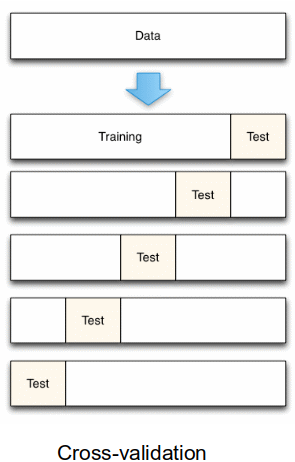

In [33]:
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    clf = MultinomialNB()
    # clf = svm.SVC(gamma=0.01, C=100., probability=True)
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    # for the current fold only    
    accuracy = accuracy_score(target_test,preds)

    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.74      0.72      0.73        80
     neutral       0.91      0.59      0.71        51
    positive       0.71      0.91      0.80        69

    accuracy                           0.76       200
   macro avg       0.79      0.74      0.75       200
weighted avg       0.77      0.76      0.75       200

Training ke- 2
              precision    recall  f1-score   support

    negative       0.79      0.73      0.76        71
     neutral       0.76      0.58      0.66        45
    positive       0.79      0.94      0.86        84

    accuracy                           0.79       200
   macro avg       0.78      0.75      0.76       200
weighted avg       0.78      0.79      0.78       200

Training ke- 3
              precision    recall  f1-score   support

    negative       0.79      0.74      0.76        80
     neutral       0.83      0.56      0.67        43
    positive       0.76      0

Hasilnya nilai rata-rata accuracy pada angka 0.76. Ini menunjukkan model kita cukup stabil pada angka 0.76.

# Predict

Asumsi kita sudah oke dengan model yang dibikin, selanjutnya melakukan predict pada model untuk mengetes jika model sudah jalan.

In [38]:
# Perampok baik hati
original_text =  '''
3hours Late Flight - and now we need to wait TWENTY MORE MINUTES for a gate! I have patience but none for incompetence.
'''

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

neutral
